<a href="https://colab.research.google.com/github/mulcahrj/6999_Capstone/blob/main/DATA6999_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATA6999/selected_features.csv",na_values='-')

In [ ]:
df.head(5)

,InscClaimAmtReimbursed,Hospitalization_Duration,NoOfMonths_PartBCov,NoOfMonths_PartACov,Claim_Period,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,Patient_Age,Patient_Risk_Score,ChronicCond_Alzheimer,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,Gender_1,Gender_2,Race_1,PotentialFraud,Provider
0,0.994980,1.000000,1.0,1.0,0.991831,0.998780,0.056535,0.395268,0.602524,1,0,1,1,0,1,1,PRV55912
1,0.204499,0.000000,1.0,1.0,0.000000,0.997524,0.204382,0.548797,0.351837,1,0,0,1,0,1,1,PRV55912
2,0.992624,1.000000,1.0,1.0,0.998328,0.996393,0.073183,0.889586,0.436861,1,0,0,0,1,1,1,PRV55912
3,0.991593,1.000000,1.0,1.0,0.999427,0.995721,0.373397,0.707005,0.177925,0,1,0,1,0,1,1,PRV55912
4,0.988580,0.999998,1.0,1.0,0.981119,0.997969,0.204382,0.564990,0.520349,0,1,1,0,1,1,1,PRV55912


In [ ]:
provider = df['Provider']

In [ ]:
df = df.drop('Provider', axis=1)

In [ ]:
df.head(5)

,InscClaimAmtReimbursed,Hospitalization_Duration,NoOfMonths_PartBCov,NoOfMonths_PartACov,Claim_Period,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,Patient_Age,Patient_Risk_Score,ChronicCond_Alzheimer,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,Gender_1,Gender_2,Race_1,PotentialFraud
0,0.994980,1.000000,1.0,1.0,0.991831,0.998780,0.056535,0.395268,0.602524,1,0,1,1,0,1,1
1,0.204499,0.000000,1.0,1.0,0.000000,0.997524,0.204382,0.548797,0.351837,1,0,0,1,0,1,1
2,0.992624,1.000000,1.0,1.0,0.998328,0.996393,0.073183,0.889586,0.436861,1,0,0,0,1,1,1
3,0.991593,1.000000,1.0,1.0,0.999427,0.995721,0.373397,0.707005,0.177925,0,1,0,1,0,1,1
4,0.988580,0.999998,1.0,1.0,0.981119,0.997969,0.204382,0.564990,0.520349,0,1,1,0,1,1,1


In [ ]:

# import required packages for splitting data
from sklearn import model_selection
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

# balance the data
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = .25, train_size = .75)

In [ ]:
#Create a log reg classifier
lgr = LogisticRegression()

#Train the model using the training sets
lgr.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = lgr.predict(x_test)

In [ ]:
df_pred = pd.DataFrame(x_test,columns=list(df.iloc[:,:-1]))

In [ ]:
df_pred['PotentialFraud'] = y_test

In [ ]:
df_pred['PredictedFraud'] = y_pred

In [ ]:
df_pred = provider.to_frame().join(df_pred, how='inner')

In [ ]:
df_pred.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Provider,139553,294,PRV51459,8240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InscClaimAmtReimbursed,139553.0,NaN,NaN,NaN,0.40359,0.302658,0.0,0.168756,0.297619,0.625431,1.0
Hospitalization_Duration,139553.0,NaN,NaN,NaN,0.072429,0.259181,0.0,0.0,0.0,0.0,1.0
NoOfMonths_PartBCov,139553.0,NaN,NaN,NaN,0.992354,0.087106,0.0,1.0,1.0,1.0,1.0
NoOfMonths_PartACov,139553.0,NaN,NaN,NaN,0.993508,0.080312,0.0,1.0,1.0,1.0,1.0
Claim_Period,139553.0,NaN,NaN,NaN,0.179147,0.374684,0.0,0.0,0.0,0.0,0.99999
IPAnnualReimbursementAmt,139553.0,NaN,NaN,NaN,0.953122,0.025796,0.907615,0.935341,0.935341,0.983984,0.999994
OPAnnualReimbursementAmt,139553.0,NaN,NaN,NaN,0.406212,0.230503,0.004482,0.20776,0.397407,0.589112,0.998305
Patient_Age,139553.0,NaN,NaN,NaN,0.508792,0.181541,0.0,0.407686,0.502575,0.615749,1.0
Patient_Risk_Score,139553.0,NaN,NaN,NaN,0.406144,0.210029,0.0,0.265454,0.436861,0.602524,1.0


/usr/local/lib/python3.10/dist-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


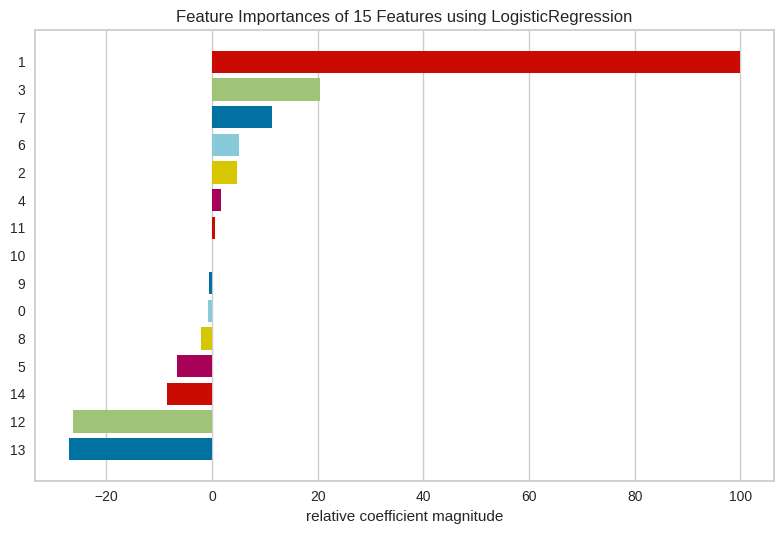

FeatureImportances(ax=<Axes: title={'center': 'Feature Importances of 15 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>,
                   estimator=LogisticRegression())

In [ ]:
from yellowbrick.model_selection import feature_importances

feature_importances(lgr,x_train, y_train)

In [ ]:
feat_importances = pd.DataFrame(lgr.coef_, columns=df.iloc[:,:-1].columns)

In [ ]:
feat_importances.T

,0
InscClaimAmtReimbursed,-0.005879
Hospitalization_Duration,0.864675
NoOfMonths_PartBCov,0.041445
NoOfMonths_PartACov,0.175920
Claim_Period,0.014160
IPAnnualReimbursementAmt,-0.056939
OPAnnualReimbursementAmt,0.044700
Patient_Age,0.097438
Patient_Risk_Score,-0.018158
ChronicCond_Alzheimer,-0.005613


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76     86348
           1       0.58      0.11      0.18     53205

    accuracy                           0.63    139553
   macro avg       0.61      0.53      0.47    139553
weighted avg       0.61      0.63      0.54    139553



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6301046914075655
Precision: 0.578395489168068
Recall: 0.10989568649563011


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[82086,  4262],
       [47358,  5847]])

Text(0.5, 489.55555555555554, 'Predicted label')

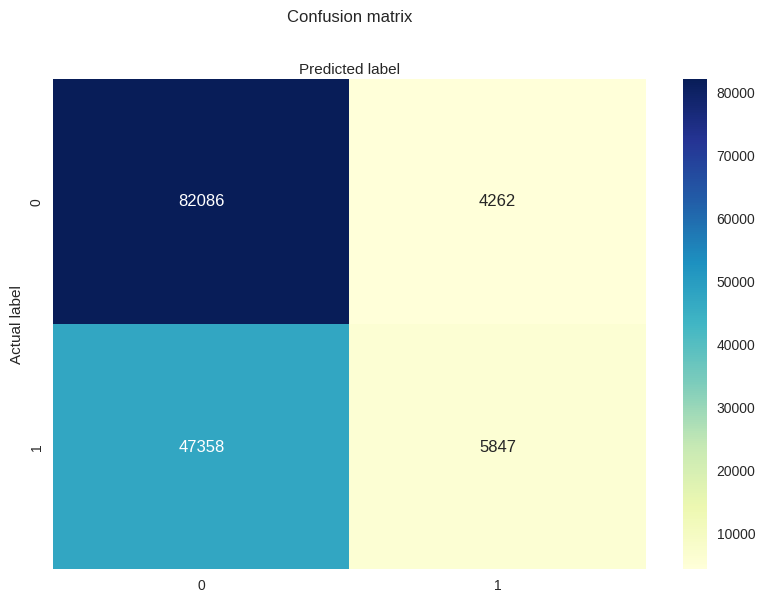

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
clf = LogisticRegression()


In [ ]:
#function inputs X:features.Y: Target, classifer: sklearn classifier, K:folds in cross validation, scoring: evaluation metric(f1)
def my_eval(X, y, classifer = clf, k=10, scoring = 'f1'):
    scores = []
    for i in range(5):
        #### generate random numbers to shuffle the data for training and test
        np.random.seed(2021)
        random_int = np.random.randint(0,3000)
        #### create cross validation folds
        kfold = model_selection.KFold(n_splits=k, random_state=random_int, shuffle=True)
        #### record the score
        score = model_selection.cross_val_score(clf, X=X, y=y, cv=kfold, scoring=scoring)
        scores.append(score)
    scores = np.array(scores)
    #### we need to calculate the bias (average score) and viariance (std)
    bias, variance = round(scores.mean(),4), round(scores.std(),4)
    return(bias, variance)

In [ ]:
# Resampling and Balancing the data
sm = SMOTE(random_state = 2021)
X_res, Y_res = sm.fit_resample(x_train, y_train)

In [ ]:
#average f1_score from 10-fold CV
clf = LogisticRegression()
my_eval(X_res, Y_res, clf, 10)

(0.2692, 0.0056)

In [ ]:
#average ROC_AUC from 10-fold CV
my_eval(X_res, Y_res, clf, 10, 'roc_auc')

(0.5388, 0.0023)

In [ ]:
grp = ['Provider','PotentialFraud','PredictedFraud']

In [ ]:
df_pred = df_pred[grp]

In [ ]:
df_ratio = df_pred.groupby(by=['Provider']).sum()

In [ ]:
df_ratio['Ratio'] = df_ratio['PredictedFraud'] / df_ratio['PotentialFraud']
df_ratio.sort_values(by=['Ratio'],ascending=False)

,PotentialFraud,PredictedFraud,Ratio
Provider,,,
PRV53431,11,7,0.636364
PRV53233,7,4,0.571429
PRV52241,10,5,0.500000
PRV51137,17,7,0.411765
PRV54875,5,2,0.400000
...,...,...,...
PRV55666,8,0,0.000000
PRV51710,4,0,0.000000
PRV55670,2,0,0.000000


In [ ]:
df_ratio.describe().T

,count,mean,std,min,25%,50%,75%,max
PotentialFraud,294.0,180.969388,302.252074,1.0,28.00000,68.500000,202.00000,3132.000000
PredictedFraud,294.0,34.384354,57.209738,0.0,5.00000,13.500000,37.75000,588.000000
Ratio,294.0,0.192067,0.074778,0.0,0.15922,0.188266,0.21875,0.636364


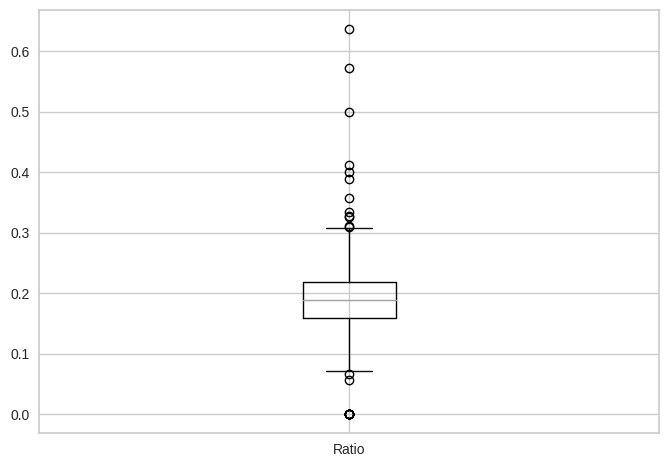

In [ ]:
df_ratio.boxplot(column=['Ratio'], return_type='axes');


In [ ]:
df_ratio['Ratio'].quantile([0.25, 0.7, 0.9])

0.25    0.159220
0.70    0.212519
0.90    0.270228
Name: Ratio, dtype: float64